In [1]:
import os, time, datetime, math

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("classification_results.csv", sep=",")

df.rename(columns={"interval": "Elapsed Time",
                   }, inplace=True)

df["Transformation"] = df["log"] | df["minmax"] | df["standard"] | df["pca"]

def foo(x):
    if x in ["logistic","sgd"]:
        x = "Classicals"
    elif x in ["ridge"]:
        x = "Regularizers"
    elif x in ["nb_bernoulli","nb_gaussian"]:
        x = "Naive Bayes"
    elif x in ["knn"]:
        x = "Nearest Neighbours"
    elif x in ["tree","extra_tree"]:
        x = "Trees"
    elif x in ["bagging","randomforest","adaboost","xgboost","gradientboost"]:
        x = "Ensemblers"
    elif x in ["svc","svc_linear"]:
        x = "Support Vector Machines"
    elif x in ["perceptron","mlp"]:
        x = "Neural Networks"
    return x
    
df["Family"] = df["model"].apply(foo)

df.head(10)

,model,description,precision,recall,f1,accuracy,corr_matrix,roc_auc,cv,feature_selection,features,n_features,multi,poly,poly_deg,log,minmax,standard,pca,pca_per,Elapsed Time,date,Transformation,Family
0,logistic,C1lbfgs,0.743,0.741,0.740,0.741,56-27-18-73,0.798,10,True,Age-Weight-A_Ancho2,3,True,False,2,False,False,True,False,0.8,0.0332,2019-10-31_14:16:06,True,Classicals
1,logistic,C001lbfgs,0.783,0.776,0.773,0.776,56-27-12-79,0.815,10,True,Age-Cervical-Weight-BMI-A_Form4-A_Ancho2-I_For...,14,True,False,2,False,False,True,False,0.8,0.0301,2019-10-31_14:22:31,True,Classicals
2,logistic,C10lbfgs,0.748,0.747,0.746,0.747,58-25-19-72,0.823,10,True,Age-Weight-A_Ancho2-O_Form3-Snorer_no,5,True,False,2,False,False,True,False,0.8,0.0348,2019-10-31_14:24:26,True,Classicals
3,logistic,C001liblinear,0.805,0.805,0.804,0.805,63-20-14-77,0.816,10,True,Age-Cervical-Weight-BMI-A_Form4-A_Ancho2-E_For...,15,True,False,2,False,False,True,False,0.8,0.0227,2019-10-31_14:30:52,True,Classicals
4,logistic,C001saga,0.783,0.776,0.773,0.776,56-27-12-79,0.815,10,True,Age-Cervical-Weight-BMI-A_Form4-A_Ancho2-I_For...,14,True,False,2,False,False,True,False,0.8,0.0227,2019-10-31_14:34:54,True,Classicals
5,sgd,hingel2,0.741,0.741,0.741,0.741,60-23-22-69,0.802,10,True,Age-Weight-A_Ancho2-E_Form1-E_Form2-I_Form1-I_...,12,True,False,2,False,True,False,False,0.8,0.0262,2019-10-31_14:43:14,True,Classicals
6,sgd,logl1,0.735,0.736,0.735,0.736,59-24-22-69,0.798,10,True,Age-Weight-A_Ancho2-E_Form1-I_Ancho2-O_Form3-S...,7,True,False,2,False,True,False,False,0.8,0.0252,2019-10-31_14:44:48,True,Classicals
7,nb_bernoulli,alpha05,0.701,0.701,0.701,0.701,55-28-24-67,0.729,10,True,Age-Cervical-Weight-BMI-A_Ancho1-A_Ancho2-A_An...,34,True,False,2,False,False,True,False,0.8,0.0203,2019-10-31_16:13:25,True,Naive Bayes
8,nb_bernoulli,alpha1,0.695,0.695,0.695,0.695,55-28-25-66,0.730,10,True,Age-Cervical-Weight-BMI-A_Ancho1-A_Ancho2-A_An...,34,True,False,2,False,False,True,False,0.8,0.0246,2019-10-31_16:13:46,True,Naive Bayes
9,nb_gaussian,allfeatures,0.562,0.540,0.520,0.540,63-20-60-31,0.649,10,False,Age-Cervical-Weight-Height-BMI-A_Form1-A_Form2...,55,True,False,2,False,False,False,False,0.8,0.0222,2019-10-31_16:19:10,False,Naive Bayes


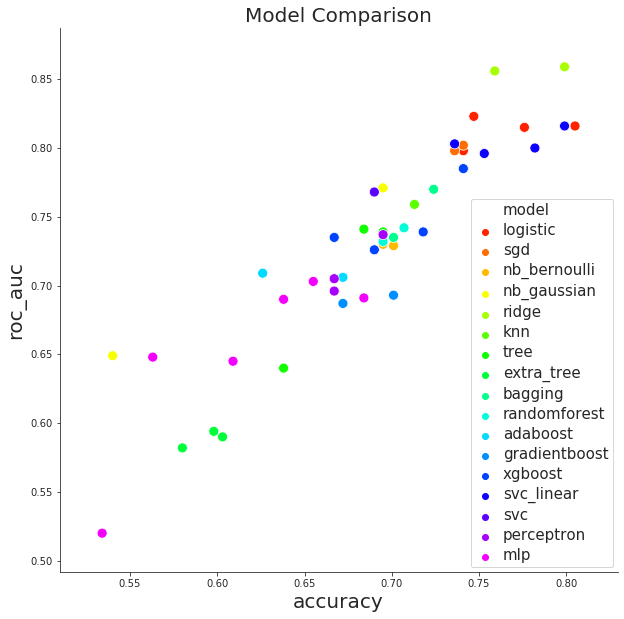

In [17]:
x = "accuracy"
y = "roc_auc"
hue = "model"

plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white")
sns.set_style("ticks")

ax = sns.scatterplot(x=x,
                y=y,
                data=df,
                hue=hue,
                palette="gist_rainbow",
                s=100)

ax.set_title('Model Comparison', fontsize=20)
ax.set_xlabel(x,fontsize=20)
ax.set_ylabel(y,fontsize=20)
#ax.set(ylim=(16, 19.5), 
#       xlim=(11.5,17))
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text


sns.despine()

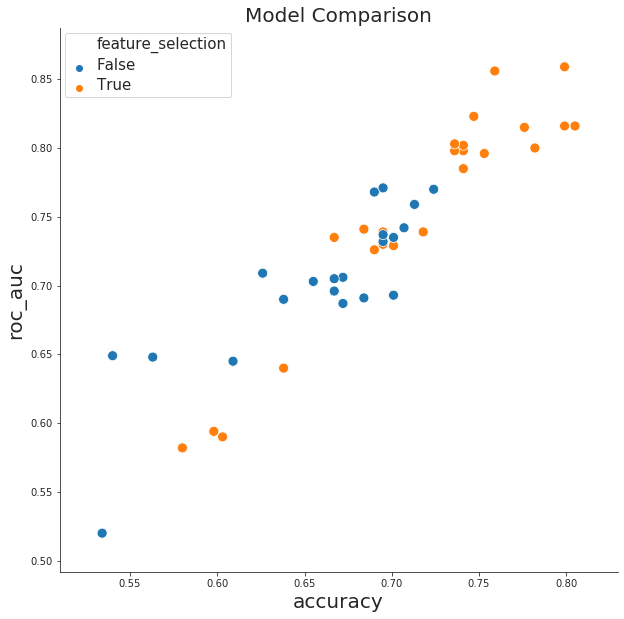

In [4]:
x = "accuracy"
y = "roc_auc"
hue = "feature_selection"

plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white")
sns.set_style("ticks")

ax = sns.scatterplot(x=x,
                y=y,
                data=df,
                hue=hue,
                #palette="Set1",
                s=100)

ax.set_title('Model Comparison', fontsize=20)
ax.set_xlabel(x,fontsize=20)
ax.set_ylabel(y,fontsize=20)
#ax.set(ylim=(16, 19.5), 
#       xlim=(11.5,17))
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text

sns.despine()

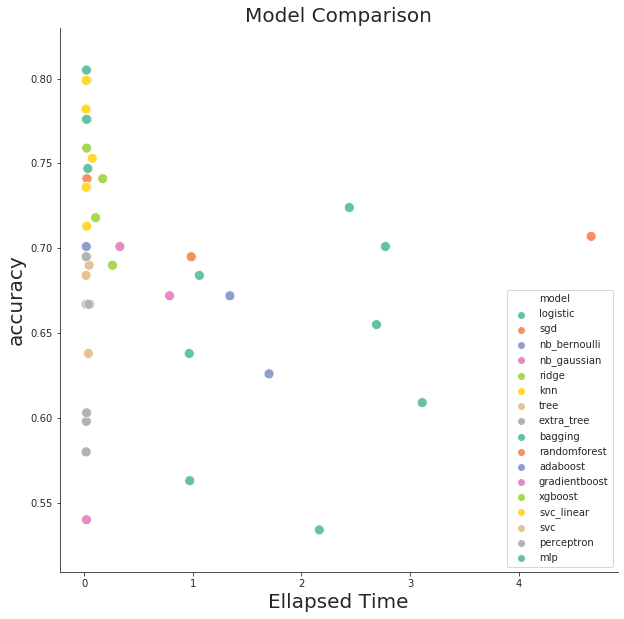

In [23]:
x = "Elapsed Time"
y = "accuracy"
hue = "model"

plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white")
sns.set_style("ticks")

ax = sns.scatterplot(x=x,
                y=y,
                data=df,
                hue=hue,
                palette="Set2",
                s=100)

ax.set_title('Model Comparison', fontsize=20)
ax.set_xlabel(x,fontsize=20)
ax.set_ylabel(y,fontsize=20)
#ax.set(ylim=(16, 19), 
#       xlim=(0,0.1))

sns.despine()

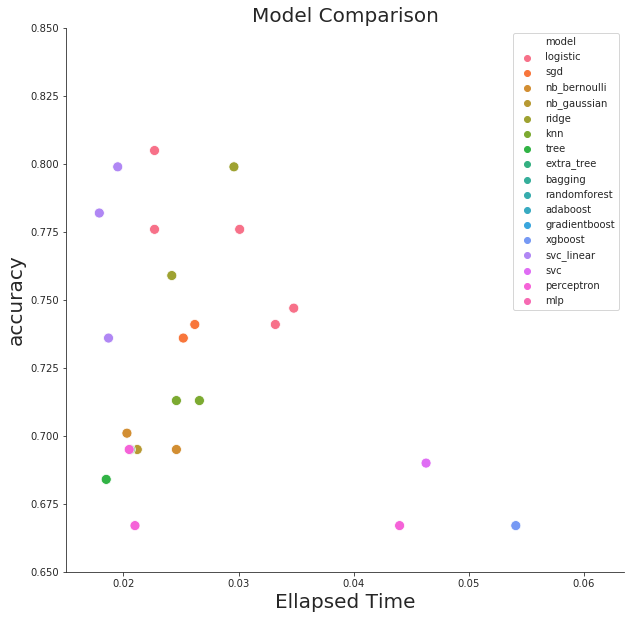

In [30]:
x = "Elapsed Time"
y = "accuracy"
hue = "model"

plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white")
sns.set_style("ticks")

ax = sns.scatterplot(x=x,
                y=y,
                data=df,
                hue=hue,
                #palette="Set2",
                s=100)

ax.set_title('Model Comparison', fontsize=20)
ax.set_xlabel(x,fontsize=20)
ax.set_ylabel(y,fontsize=20)
ax.set(ylim=(0.65, 0.85), 
       xlim=(0.015,0.0635))

sns.despine()

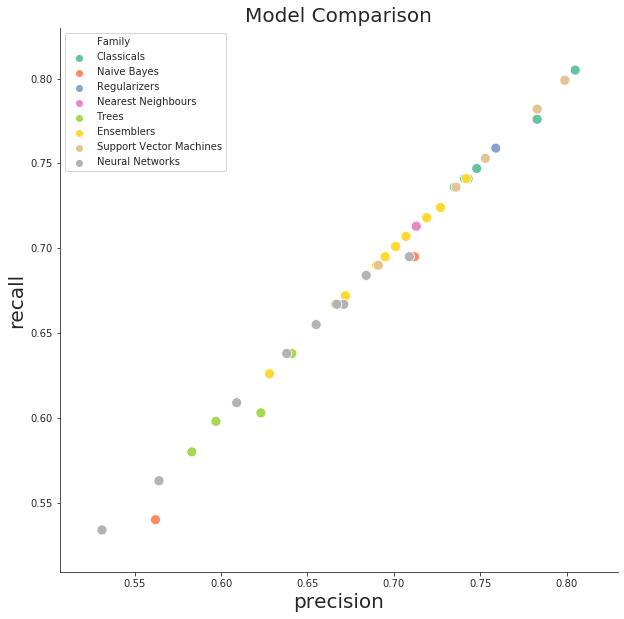

In [31]:
x = "precision"
y = "recall" #try without limiting the axes
hue = "Family"

plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white")
sns.set_style("ticks")

ax = sns.scatterplot(x=x,
                y=y,
                data=df,
                hue=hue,
                palette="Set2",
                s=100,
                )

ax.set_title('Model Comparison', fontsize=20)
ax.set_xlabel(x,fontsize=20)
ax.set_ylabel(y,fontsize=20)
#ax.set(ylim=(0, 26), 
#       xlim=(11,15)
#      )

sns.despine()

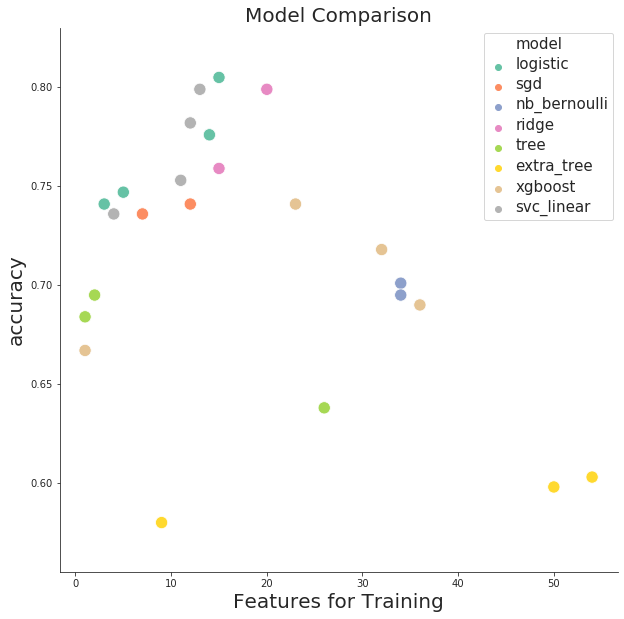

In [5]:
df_ = df[df["feature_selection"]==True]
x = "n_features"
y = "accuracy" #try without limiting the axes
hue = "model"

plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white")
sns.set_style("ticks")

ax = sns.scatterplot(x=x,
                y=y,
                data=df_,
                hue=hue,
                palette="Set2",
                s=150,
                )

ax.set_title('Model Comparison', fontsize=20)
ax.set_xlabel("Features for Training",fontsize=20)
ax.set_ylabel(y,fontsize=20)
#ax.set(ylim=(0, 26), 
#       xlim=(11,15)
#      )
plt.setp(ax.get_legend().get_texts(), fontsize='15') # for legend text

sns.despine()

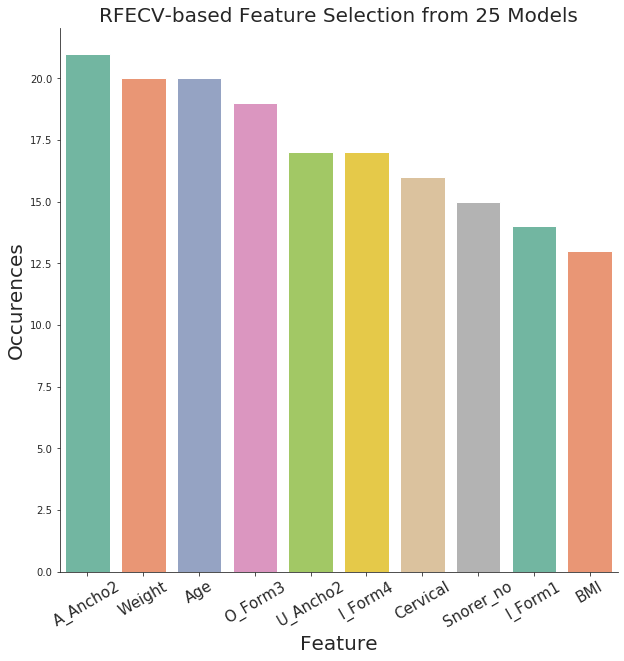

In [9]:
features_ = list(df[df["feature_selection"]==True]["features"].values)

features_join = '-'.join(features_).split("-")

df_feature = pd.DataFrame(features_join, columns=["feature"])

df_feature = df_feature["feature"].value_counts().to_frame()

df_feature

x = df_feature.index[:10]
y = "feature"

plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white")
sns.set_style("ticks")

ax = sns.barplot(x=x,
                y=y,
                data=df_feature.iloc[:10],
                palette="Set2",
                )

ax.set_title('RFECV-based Feature Selection from 25 Models', fontsize=20)
ax.set_xlabel("Feature",fontsize=20)
ax.set_ylabel("Occurences",fontsize=20)
ax.set_xticklabels(x,rotation=30,fontsize=15)
sns.despine()

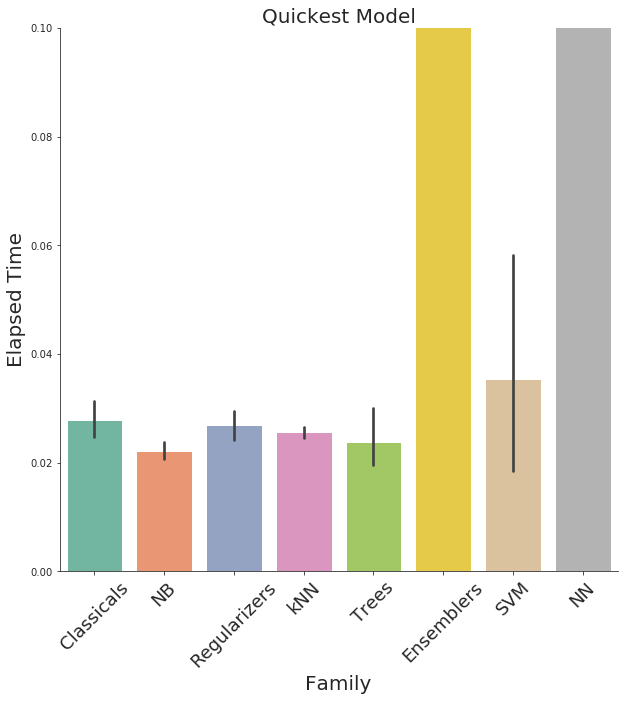

In [15]:
x = "Family"
y = "Elapsed Time"
df_sorted = df.sort_values(y,ascending=True)
df_sorted["model-desc"] = df_sorted["model"]+"-"+ df_sorted["description"]


plt.rcParams['figure.figsize']=(10,10)
sns.set_style("white")
sns.set_style("ticks")

ax = sns.barplot(x=x,
                 y=y,
                 data=df,
                 palette="Set2",
                 )

ax.set_title('Quickest Model', fontsize=20)
ax.set_xlabel(x,fontsize=20)
ax.set_ylabel(y,fontsize=20)
ax.set_ylim(0,0.1)
ax.set_xticklabels(["Classicals", "NB","Regularizers", "kNN", "Trees", "Ensemblers", "SVM", "NN"],rotation=45, fontsize=18)
sns.despine()
plt.show()